In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import seaborn as sn


In [3]:
df = pd.read_csv('output.csv')
x_train = df.drop(columns=['class'])
y_train= df['class']
y_trainsample = y_train.head(100)


In [4]:
for column in x_train.columns:
    if x_train[column].dtype==type(object):
         labelencoder = LabelEncoder()
         x_train[column] = labelencoder.fit_transform(x_train[column])
x_trainsample = x_train.head(100)
x_train.head(10)

,duration,Type,mode,len,IP,len.1,src_IP,dst_IP,len.2
0,0,0,0,6,0,4,36,5,28
1,1,0,0,6,0,4,36,48,28
2,2,0,0,6,0,4,11,5,28
3,3,0,0,6,0,4,11,23,28
4,4,0,0,6,0,4,54,5,28
5,5,0,0,6,0,4,54,14,28
6,6,0,0,6,0,4,17,5,28
7,7,0,0,6,0,4,17,35,28
8,8,0,0,6,0,4,21,5,28
9,9,0,0,6,0,4,21,0,28


In [5]:
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y_trainsample)


In [6]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_trainsample, y)

SVC(kernel='linear')

In [7]:
df2 = pd.read_csv('output.csv')
x1 = df2.drop(columns = ['class'])
y1= df2['class']
y2 = y1.head(100)
x1.head(100)


,duration,Type,mode,len,IP,len.1,src_IP,dst_IP,len.2
0,23:08:19.369122,"ARP,",Ethernet,6,len,4,10.0.0.43,"10.0.0.1,",28
1,23:08:19.370399,"ARP,",Ethernet,6,len,4,10.0.0.43,a2:af:f7:fa:e7:79,28
2,23:08:19.537579,"ARP,",Ethernet,6,len,4,10.0.0.20,"10.0.0.1,",28
3,23:08:19.539086,"ARP,",Ethernet,6,len,4,10.0.0.20,3e:c3:a1:ab:99:4b,28
4,23:08:19.709037,"ARP,",Ethernet,6,len,4,10.0.0.6,"10.0.0.1,",28
...,...,...,...,...,...,...,...,...,...
95,23:08:33.473897,"ARP,",Ethernet,6,len,4,10.0.0.63,ae:e5:93:81:ca:fd,28
96,23:08:33.773940,"ARP,",Ethernet,6,len,4,10.0.0.35,"10.0.0.1,",28
97,23:08:33.775491,"ARP,",Ethernet,6,len,4,10.0.0.35,8a:a4:5e:ac:d6:2f,28
98,23:08:34.205108,"ARP,",Ethernet,6,len,4,10.0.0.36,"10.0.0.1,",28


In [8]:
for column in x1.columns:
    if x1[column].dtype == type(object):
        labelencoder1 = LabelEncoder()
        x1[column] = labelencoder1.fit_transform(x1[column])


In [9]:
for column in x1.columns:
    if x1[column].dtype == type(object):
        labelencoder1 = LabelEncoder()
        x1[column] = labelencoder1.fit_transform(x1[column])


In [10]:
labelencoder = LabelEncoder()

y_test = labelencoder.fit_transform(y2)


In [12]:
x_test = x1.head(100)
y_pred = svclassifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[50  0]
 [ 3 47]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.94      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



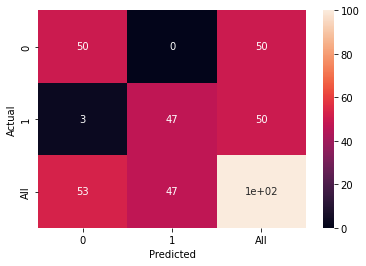

In [15]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(cm, annot=True)
plt.show()